# Аналитический проект "Развитие игровой индустрии в начале XXI века"

- Автор: Игнатьев Валерий
- Дата: 30.08.2025

### Цели и задачи проекта

* Создание аналитической статьи для привлечения новой аудитории к игре «Секреты Темнолесья»;
* Комплексный анализ развития игровой индустрии в период 2000-2013 гг;
* Анализ объёмов продаж игр разных жанров и региональные предпочтения игроков.

### Описание данных

Данные `/datasets/new_games.csv` содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:
* `Name` — название игры;
* `Platform` — название платформы;
* `Year of Release` — год выпуска игры;
* `Genre` — жанр игры;
* `NA sales` — продажи в Северной Америке (в миллионах проданных копий);
* `EU sales` — продажи в Европе (в миллионах проданных копий);
* `JP sales` — продажи в Японии (в миллионах проданных копий);
* `Other sales` — продажи в других странах (в миллионах проданных копий);
* `Critic Score` — оценка критиков (от 0 до 100);
* `User Score` — оценка пользователей (от 0 до 10);
* `Rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Содержимое проекта

## 1. Загрузка данных и знакомство с ними

- Загрузка необходимых библиотек Python и данных датасета `/datasets/new_games.csv`.


In [1]:
# Устанавливаем библиотеку для работы с пропусками
!pip install missingno -q

In [2]:
# Импортируем библиотеку pandas
import pandas as pd
# Импортируем библиотеку для визуализации пропусков
import missingno as msno

In [3]:
# Выгружаем данные из датасета new_games.csv в датафрейм games_df
games_df = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv')

In [4]:
# Выводим информацию о датафрейме
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


**Общий анализ датасета:**
* В датасете содержится 11 колонок и 16 956 строк
* 4 колонки содержат тип данных `float64` (число с плавающей точкой). 7 колонок содержат тип данных `object` (строковые данные)
* Колонки `Platform`, `NA sales`, `EU sales`, `JP sales`, `Other sales` не содержат пропуски. В остальных колонках встречаются пропуски в данных.
* Необходимо преобразовать названия столбцов в snake case.

In [5]:
# Выводим первые строки датафрейма на экран
games_df.head()

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- **Числовые значения с плавающей точкой (float64).** 
    - К колонкам `NA sales`, `Other sales`, `Critic Score` применен правильный тип данных, но можно уменьшить разрядность до 32. 
    - Для колонки `Year of Release` тип `float64` некорректен. Для работы со временем обычно происходят преобразования в тип данных `datetime64`, который позволит корректно производить работу с данными. Т.к нам необходим только год, то при вычислении через `.dt.year` присвоится тип данных отличный от даты. Можно преобразовать в тип данных `integer` после обработки NaN.
- **Строковые данные (object).** 
    - Колонка `Name` содержит строковую информацию, к ней применен корректный тип данных.
    - Колонки `Platform`, `Genre`, `Rating` также хранят текстовые данные, но их можно рассматривать как категориальные признаки. Для них можно использовать тип `category` для оптимизации памяти и улучшении производительности.
    - Колонки `EU sales`, `JP sales`, `User Score` содержат числовые значения с плавающей точкой. Необходимо преобразовать данные колонки в тип данных `float32` для произведения расчетов.


In [6]:
# Определяем период, за который присутствуют данные в датафрейме
min_date = games_df['Year of Release'].min()
max_date = games_df['Year of Release'].max()
f"Минимум - {min_date}. Максимум - {max_date}"

'Минимум - 1980.0. Максимум - 2016.0'

**В датафрейме нахоятся данные с 1980 года по 2016 год.**

In [7]:
# Выборочная проверка уникальных значений
games_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan, 'MISC', 'ROLE-PLAYING', 'RACING', 'ACTION',
       'SHOOTER', 'FIGHTING', 'SPORTS', 'PLATFORM', 'ADVENTURE',
       'SIMULATION', 'PUZZLE', 'STRATEGY'], dtype=object)

**В датафрейме присутствуют, как явные, так и неявные дубликаты. Пример жанры - Racing, RACING.**

In [8]:
# Изучение пропусков в необходимых для группировки колонках с рейтингом
games_df['Critic Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
games_df['User Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке `Critic Score` присутутсвуют значения `NaN`, которые можно интерпретировать как отсутствие рейтинга у игры.

В колонке `User Score` присутствуют значения `NaN`, которые можно интерпретировать как отсутствие рейтинга у игры и значения `tbd`, которые означают, что информация ещё не известна или подлежит уточнению. При работе с пропусками учтем эти выводы.

---

## 2.  Проверка ошибок в данных и их предобработка


### 2.1. Названия, или метки, столбцов датафрейма

- Вывод на экран названия всех столбцов датафрейма и проверка их стиля написания.
- Приведение всех столбцов к стилю snake case. Названия должны быть в нижнем регистре, а вместо пробелов — подчёркивания.

In [10]:
games_df.columns

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')

In [11]:
# Переименовываем названия колонок в snake case
games_df.columns = games_df.columns.str.lower().str.replace(" ", "_")

In [14]:
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Типы данных

- Предположить причины некорректных типов данных.
- Провести преобразование типов данных.

<span style="color: #6e6e6e;">
    
#### Вспомним комментарии ранее
- **Числовые значения с плавающей точкой (float64).** 
    - К колонкам `NA sales`, `Other sales`, `Critic Score` применен правильный тип данных, но можно уменьшить разрядность до 32. 
    - Для колонки `Year of Release` тип `float64` некорректен. Для работы со временем обычно происходят преобразования в тип данных `datetime64`, который позволит корректно производить работу с данными. Т.к нам необходим только год, то при вычислении через `.dt.year` присвоится тип данных отличный от даты. Можно преобразовать в тип данных `integer` после обработки NaN.
- **Строковые данные (object).** 
    - Колонка `Name` содержит строковую информацию, к ней применен корректный тип данных.
    - Колонки `Platform`, `Genre`, `Rating` также хранят текстовые данные, но их можно рассматривать как категориальные признаки. Для них можно использовать тип `category` для оптимизации памяти и улучшении производительности.
    - Колонки `EU sales`, `JP sales`, `User Score` содержат числовые значения с плавающей точкой. Необходимо преобразовать данные колонки в тип данных `float32` для произведения расчетов.
    
</span>

In [15]:
# Уменьшаем разрядность и преобразуем колонки через pd.to_numeric для обработки ошибок и автоматического выбора разрядности
columns_name = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']
for column in columns_name:
    games_df[column] = pd.to_numeric(games_df[column], errors='coerce', downcast='float')

In [16]:
# Меняем тип данных в category
columns_name = ['platform', 'genre', 'rating']
for column in columns_name:
    games_df[column] = games_df[column].astype('category')

**Анализ некорректных типов данных:**
* Для колонки `Year of Release` тип данных был `float64`. Скорее всего при загрузке данных с NaN значением в датафрейм произошло приведение в тип данных с плавающей точкой.
* Колонки `Platform`, `Genre`, `Rating` автоматически загрузились в тип `object` т.к. содержали строковую информацию.
* Колонки `EU sales`, `JP sales` содержали значение *unknow*. Эти строчные значения вместо NaN повлияли на тип данных `object` при загрузке в датафрейм.
* Колонка `User Score` содержала значение *tbd*. Форматирование этой колонки произведем позже, после анализа пропусков, для детальной аналитики.

### 2.3. Наличие пропусков в данных

- Посчитать количество пропусков в каждом столбце в абсолютных и относительных значениях.


In [17]:
# Считаем абсолютные кол-ва пропусков
games_df.isna().sum()

name                  2
platform              0
year_of_release     275
genre                 2
na_sales              0
eu_sales              6
jp_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64

In [18]:
# Считаем относительные кол-ва пропусков
round(games_df.isna().mean()*100, 2)

name                0.01
platform            0.00
year_of_release     1.62
genre               0.01
na_sales            0.00
eu_sales            0.04
jp_sales            0.02
other_sales         0.00
critic_score       51.39
user_score         54.66
rating             40.52
dtype: float64

**Анализ пропусков в значениях:**
* 8 колонок содержат пропуска.
* Пропуски в колонках `eu_sales` и `jp_sales` допустимы и могут быть связаны остутствием продаж или отсутствием информации о продажах. Т.К. процент этих пропусков мал **0.04%** и **0.02%**, в рассчетах мы можем обозначить их как среднее значение по платформе и дате выхода игры. Такие пропуска относятся к типу *MAR* или *MNAR*. Можно изучить их распределение и понять к какому типу их отнести.
* Пропуски в колонках `critic_score` и `user_score` могут обозначать отсутствие оценок игры или отсутствие данных об оценках игры. Эти пропуски занимают **более 50%** всех данных. Эти пропуска необходимо обработать, т.к. по ним надо делать категорирование данных. Такие пропуска относятся к типу *MAR*. Для игр могут отсутствовать оценки по причинам возраста игр, неактуальности платформы в год выпуска игры и региональных осбенностей. Необходимо изучить их детальнее и принять решение по их обработке.
* Колонка `rating` содержит **40%** значений NaN. По данным из интернета, рейтинг может отсутствовать по множеству причин (отсутствие денег у маленьких студий, региональные системы рейтингов и т.п.). Эта колонка не нужна для расчетов, поэтому можем их оставить. Такие пропуска относятся к типу *MNAR*.
* Колонки `name` и `genre` содержат **0.01%** пропусков. Это может быть связано с технической ошибкой занесения данных. Можем не учитывать их в расчетах. Такие пропуска относятся к типу *MCAR*.
* Колонка `year_of_release` содержит **1.62%** пропусков. Это может быть связано с технической ошибкой занесения данных или отсутсвие релиза игры. Значения выхода игр можно собрать вручную для каждой игры при необходимости, но это будет ресурсозатратно. Т.к. процент NaN мал, можем не учитывать их для расчетов. Такие пропуска относятся к типу *MNAR* или *MCAR*.

<AxesSubplot:>

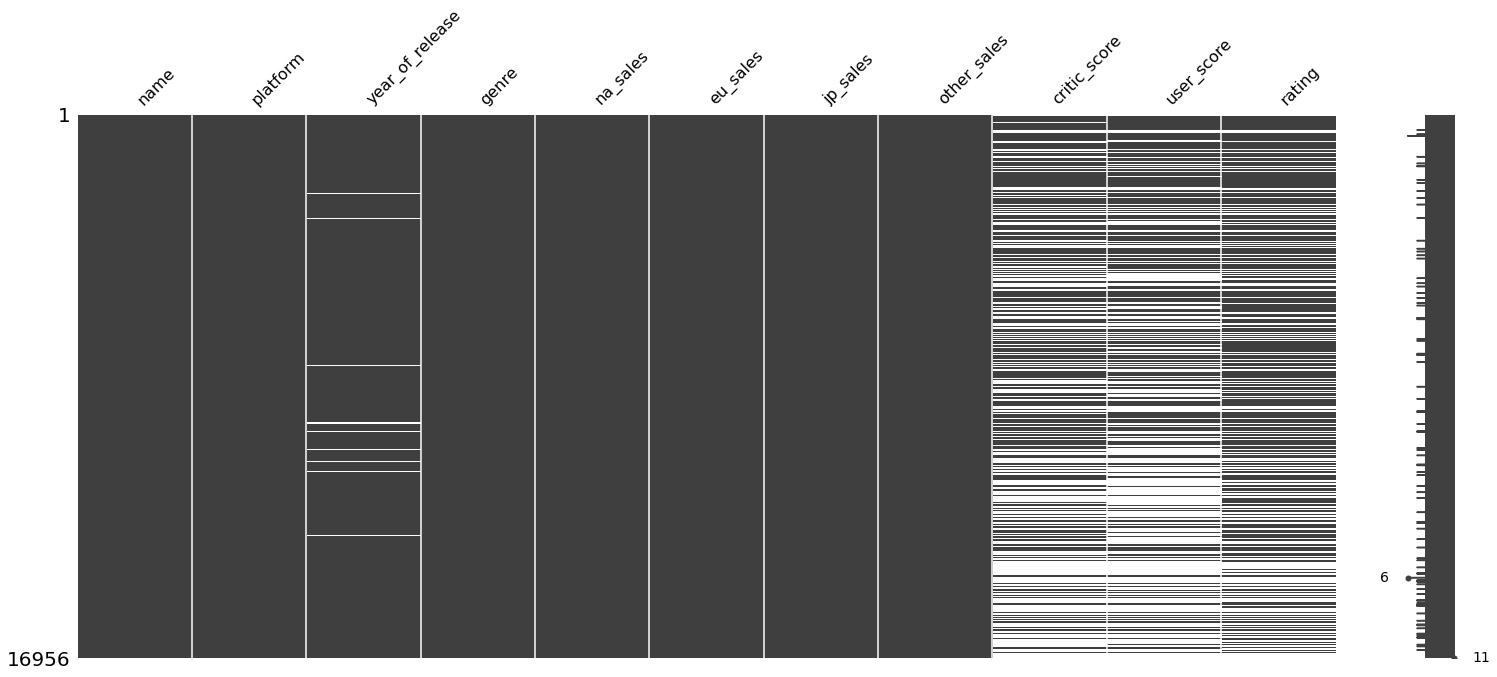

In [20]:
# Изучаем пропуски детальнее. Выводим диаграмму пропусков
msno.matrix(games_df)

Как мы видим из визуализации, пропуска в трех колонках практически хаотичны. Существуют совпадения между отсутствиями рейтингов `critic_score` и `user_score`. Необходимо изучить данные еще детальнее.

<AxesSubplot:>

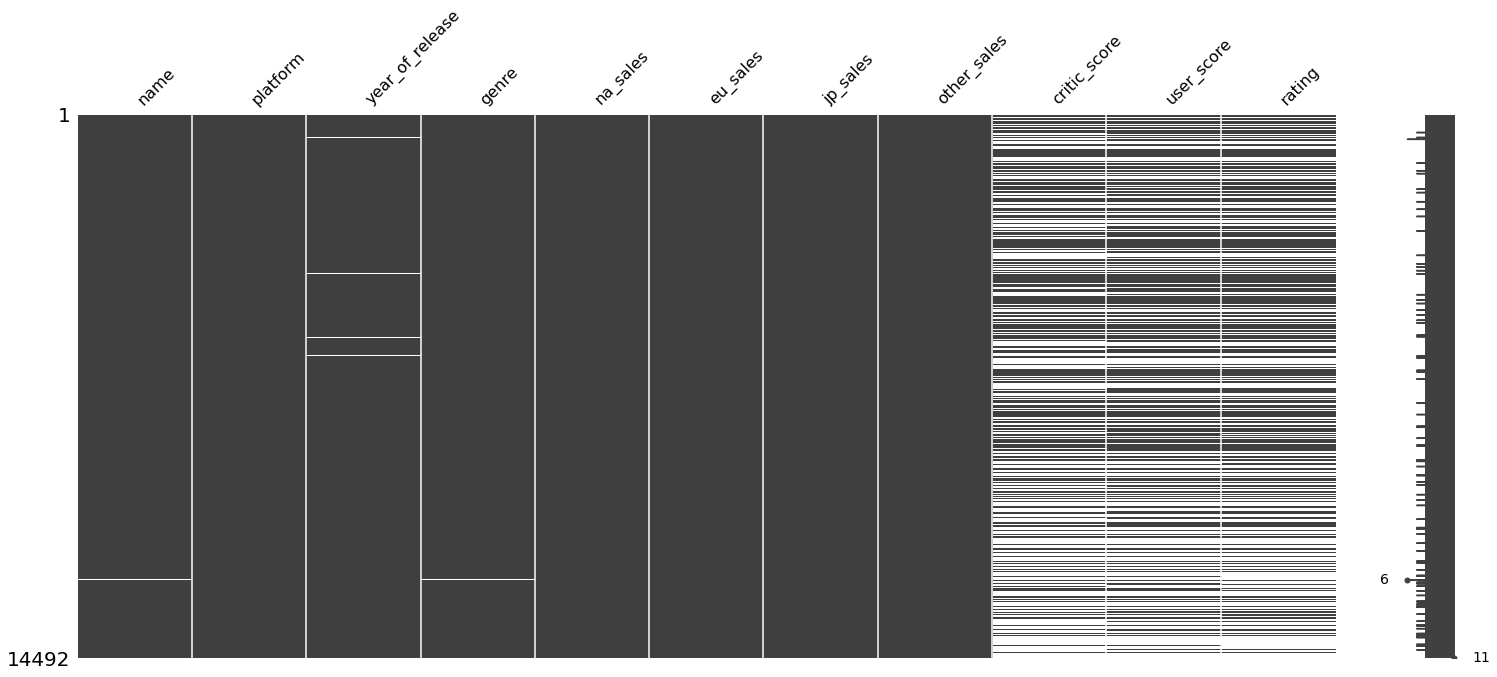

In [13]:
# Изучим пропуска без значения tbd
msno.matrix(games_df[games_df['user_score'] != 'tbd'])

При анализе пропусков в колонке `user_score` без значения `tbd` можно наблюдать более явную связь в отсутствии трех рейтингов.

In [21]:
# Изучаем пропуска по различным группам
games_df.groupby('platform')['critic_score'].apply(lambda x: x.isna().mean() *100).sort_values()

platform
XB       12.038141
GC       19.538188
PC       26.666667
X360     27.322404
XOne     31.872510
PS4      36.202532
PS3      38.597786
WiiU     38.775510
PS2      39.972590
GBA      47.072879
Wii      55.895522
PSP      61.838893
DS       66.743225
3DS      68.113208
PSV      71.724138
DC       73.076923
PS       83.374486
NG      100.000000
NES     100.000000
N64     100.000000
GG      100.000000
SAT     100.000000
SCD     100.000000
SNES    100.000000
TG16    100.000000
WS      100.000000
GEN     100.000000
GB      100.000000
3DO     100.000000
PCFX    100.000000
2600    100.000000
Name: critic_score, dtype: float64

Как мы можем наблюдать, для ряда платформ полностью отсутствуют рейтинги пользователей и критиков.

In [22]:
games_df.groupby(['year_of_release', ])['critic_score'].apply(lambda x: x.isna().mean() *100).sort_values()

year_of_release
2002.0     24.433850
2003.0     24.588086
2004.0     26.459144
2005.0     30.315789
2001.0     32.179226
2006.0     38.627451
2007.0     41.954023
2013.0     49.637681
2008.0     49.826990
2012.0     51.492537
2016.0     54.240631
2009.0     54.551724
2014.0     55.136986
2011.0     56.222802
2000.0     59.663866
2010.0     60.203284
2015.0     62.908497
1999.0     88.269795
1998.0     92.708333
1985.0     92.857143
1988.0     93.333333
1997.0     94.197952
1996.0     97.003745
1992.0     97.674419
1994.0     99.173554
1991.0    100.000000
1990.0    100.000000
1989.0    100.000000
1987.0    100.000000
1986.0    100.000000
1995.0    100.000000
1984.0    100.000000
1983.0    100.000000
1982.0    100.000000
1981.0    100.000000
1993.0    100.000000
1980.0    100.000000
Name: critic_score, dtype: float64

Как мы можем наблюдать, до 2000 года практически отсутствовали оценки критиков на все игры

In [23]:
# Изучаем распределение пропусков по платформам и году релиза
games_info = games_df[games_df['year_of_release'].between(2000,2013)].groupby(['platform','year_of_release'])['critic_score'].apply(lambda x: x.isna().mean() *100).sort_values().reset_index()
games_info[games_info['critic_score'].notna()]

,platform,year_of_release,critic_score
0,XB,2007.0,0.000000
1,XB,2000.0,0.000000
2,GC,2001.0,0.000000
3,XB,2001.0,3.030303
4,PS4,2013.0,6.250000
...,...,...,...
116,XB,2008.0,100.000000
117,PS,2003.0,100.000000
118,N64,2000.0,100.000000
119,Wii,2013.0,100.000000


In [24]:
# Создаем колонку с общими продажами
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

In [25]:
# Проведем оценку кол-ва проданных копий для игр без рейтингов
sales_wo_rating = games_df[(games_df['critic_score'].isna()) & (games_df['year_of_release'].between(2000,2013))]['total_sales'].sum()
sales_wo_rating

1531.26

In [26]:
# Проведем оценку кол-ва проданных копий для игр с рейтингом
total_sales = games_df[games_df['year_of_release'].between(2000,2013)]['total_sales'].sum()
total_sales

6476.1

In [27]:
sales_wo_rating/total_sales

0.23644786

Как мы можем отметить данные по рейтингу отсутствуют с определенной последовательностью, что указывает на тип пропусков `MAR`

При анализе колонки `critic_score` мы выявили некоторые закономерности, которые могут служить обоснованием отсутствия рейтинга. Отсуствие рейтинга может быть вызвано отсутствием актуальности платформы в определенное время. Например в 2008 году популярностью пользовался XB360, а XB был уже раритетом). 

Продажи игр без оценок занимают 23% от всех продаж. NaN значения связаны с отсутствием рейтинга, заменим их на -1.

In [28]:
# Удаляем NaN для колонок name, genre и удаляем столбец промежуточных расчетов
new_games_df = games_df.dropna(subset=['name', 'genre'])
new_games_df = new_games_df.drop('total_sales', axis=1) 

In [29]:
# Убираем все строки с Nan в дате
new_games_df = new_games_df.dropna(subset=['year_of_release'])

In [30]:
# Замена пропусков на средние значения в колонках eu_sales и jp_sales
def mean_group_sales(row, column):
    if pd.isna(row[column]):
        group = new_games_df[(new_games_df['platform'] == row['platform']) & 
                             (new_games_df['year_of_release'] == row['year_of_release'])]
        return group[column].mean()
    else:
        return row[column]
    
columns = ['eu_sales', 'jp_sales']
for column in columns:
    new_games_df[column] = new_games_df.apply(lambda row: mean_group_sales(row, column), axis=1)

Замена пропусков в продажах по регионам на среднее значение в зависимости от названия платформы и года выхода игры.

<span style="color: #6e6e6e;"> Была применена Лямбда функция для передачи аргументов в функцию

In [31]:
new_games_df['critic_score'] = new_games_df['critic_score'].fillna(-1)

In [32]:
new_games_df['user_score'] = new_games_df['user_score'].fillna(-1)

In [33]:
# Анализ NaN значений после обработки
new_games_df[new_games_df['year_of_release'].between(2000, 2013)].isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             4133
dtype: int64

### 2.4. Явные и неявные дубликаты в данных

- Изучить уникальные значения в категориальных данных, например с названиями жанра игры, платформы, рейтинга и года выпуска. Проверить, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.
- При необходимости провести нормализацию данных с текстовыми значениями.

In [34]:
# Проверка неявных дубликатов в колонке platform
new_games_df.sort_values('platform')['platform'].unique().to_list()

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Неявные дубликаты в данных отсутствуют

In [35]:
# Проверка неявных дубликатов в колонке genre
new_games_df.sort_values('genre')['genre'].unique().to_list()

['ACTION',
 'ADVENTURE',
 'Action',
 'Adventure',
 'FIGHTING',
 'Fighting',
 'MISC',
 'Misc',
 'PLATFORM',
 'PUZZLE',
 'Platform',
 'Puzzle',
 'RACING',
 'ROLE-PLAYING',
 'Racing',
 'Role-Playing',
 'SHOOTER',
 'SIMULATION',
 'SPORTS',
 'STRATEGY',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

Неявные дубликаты в данной колонке присутствуют и связаны с различным регистром. Необходимо привести все данные к нижнему регистру

In [36]:
# Проверка неявных дубликатов в колонке rating
new_games_df.sort_values('rating')['rating'].unique()

['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', NaN]
Categories (8, object): ['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']

Неявные дубликаты в данной колонке присутствуют. В рейтинге указаны региональная категория K-A, преобразуем ее в единую систему ESRB.

In [37]:
# Замена рейтинга согласно стандарту рейтингов ESRB
new_games_df['rating'] = new_games_df['rating'].replace('K-A', 'E')

In [60]:
new_games_df['name'].shape[0]

16443

Т.к в колонке с названием игры множество значений, приведем ее в нижний регистр для удобного поиска дубликатов

In [39]:
# Преобразование колонок в необходимые регистры
new_games_df['name'] = new_games_df['name'].str.lower()
new_games_df['genre'] = new_games_df['genre'].str.lower()

Данные преобразованы и теперь можно искать явные дубликаты

In [40]:
# Найдем кол-во явных дубликатов
new_games_df.duplicated().sum()

235

В датафрейме найдено 235 явных дубликатов

In [41]:
# Удалим явные дубликаты
new_games_df = new_games_df.drop_duplicates()

Явные дубликаты очищены из датафрейма

In [42]:
# Найдем неявные дубликаты по ряду колонок после очистки датафрема
new_games_df_sorted = new_games_df.sort_values(by=new_games_df.columns.tolist())
new_games_df_sorted[new_games_df_sorted.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'],keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16465,madden nfl 13,PS3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E
606,madden nfl 13,PS3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E


В датафрейме остался один неявный дубликат в котором различается кол-во продаж, необходимо его обработать

In [43]:
# Объединим данное значение вручную, чтобы не нагружать сервер ради одного вычисления
new_games_df.loc[606, 'eu_sales'] += 0.01
new_games_df = new_games_df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'])

In [44]:
new_df_len = new_games_df.shape[0]
old_df_len = games_df.shape[0]
new_df_len

16443

In [45]:
old_df_len - new_df_len

513

In [46]:
(1-new_df_len/old_df_len)*100

3.0254777070063743

* Всего в новом датафрейме **16443** строки
* При обработке датафрейма были удалены **513** строк
* Доля удаленных строк составляет **3%**

**Выводы и комментарии после очистки данных:**

* **Нулевые значения:**
    * В столбцах `user_score` и `critic_score` присутствовало множество дубликатов. Эти данные необходимы нам для группировки согласно ТЗ. Отсутствие рейтинга, скорее всего, не связано с технической ошибкой, поэтому было принято решение заменить данные без оценки на индикатор `-1`.
    * Нулевые значения из столбцов с продажами были обработаны и сохранены как среднее значение по платформе и году релиза.
    * Нулевые значения в названии игры, жанре и годе выпуска незначительны и были удалены.
* **Дубликаты:**
    * Неявные дубликаты в данных были связаны с различным регистром
    * Неявные дубликаты в данных были удалены

---

## 3. Фильтрация данных

Коллеги хотят изучить историю продаж игр в начале XXI века, и их интересует период с 2000 по 2013 год включительно. Необходимо отобрать данные по этому показателю.

In [47]:
games_df_actual = new_games_df[new_games_df['year_of_release'].between(2000, 2013)]

In [48]:
games_df_actual.shape[0]

12780

In [49]:
# Проверим минимальный год в датасете с фильтрацией
games_df_actual['year_of_release'].min()

2000.0

In [50]:
# Проверим максимальный год в датасете с фильтрацией
games_df_actual['year_of_release'].max()

2013.0

* Отобраны данные с `2000` по `2013` год включительно
* За эти даты в датафрейме содержатся `12780` записей. `77%` процентов всех записей содержатся в этом временном периоде.

---

## 4. Категоризация данных
    
Провести категоризацию данных:
- Разделить все игры по оценкам пользователей и выделить такие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).

In [51]:
# Создаем копию датафрейма. Без копии выдается ошибка
games_df_actual = games_df_actual.copy()

In [52]:
# Создаем категории по колонке user_score
df_bins = [-1, 0, 30, 80, 101]
df_lables = ['Нет оценки', 'Низкая оценка', 'Средняя оценка', 'Высокая оценка']
games_df_actual['critic_score_category'] = pd.cut(games_df_actual['critic_score'], bins=df_bins, labels=df_lables, right=False)

In [53]:
# Создаем категории по колонке user_score
df_bins = [-1, 0, 3, 8, 11]
df_lables = ['Нет оценки', 'Низкая оценка', 'Средняя оценка', 'Высокая оценка']
games_df_actual['user_score_category'] = pd.cut(games_df_actual['user_score'], bins=df_bins, labels=df_lables, right=False)

Все рейтинги категорированы на `Нет оценки`, `Низкая оценка`, `Средняя оценка`, `Высокая оценка`.

In [54]:
# Считаем общую сумму продаж
games_df_actual['total_sales'] = games_df_actual['na_sales'] + games_df_actual['eu_sales'] + games_df_actual['jp_sales'] + games_df_actual['other_sales']

In [55]:
# Создаем функцию для группировки
def result_category(column_name):
    result = games_df_actual.groupby(column_name).agg({'name': 'count','total_sales': 'sum'})
    result = result.sort_values(by='name', ascending=False).reset_index()
    result['count_share'] = round(result['name']/ result['name'].sum() *100,1)
    result = result.rename(columns={'name': 'count'})
    result['total_sales'] = round(result['total_sales'], 1)
    return result

In [56]:
# Отображаем категории оценки пользователей
result_category('user_score_category')

,user_score_category,count,total_sales,count_share
0,Нет оценки,6298,1569.2,49.3
1,Средняя оценка,4080,2622.3,31.9
2,Высокая оценка,2286,2185.7,17.9
3,Низкая оценка,116,50.0,0.9


* **49%** игр не получили оценок. Это `6298` проектов.
* **32%** игр попали в категорию со средними оценками. Это `4080` проектов - `2622.3 млн.` проданных копий
* **18%** игр попали в категорию с высокой оценкой (оценка от 8 до 10). Это `2286` игр - `2185.7 млн.` проданных копий
* **1%** всех игр попал в категорию с низкой оценкой
* В среднем продается по **250 тыс** копий на игры `без оценок`, **642 тыс** копий на игры со `средним рейтигом`, **956 тыс** копий на игры с `высоким рейтингом` и **431 тыс** копий на игры с `низкими оценками`.

In [57]:
# Отображаем категории оценки критиков
result_category('critic_score_category')

,critic_score_category,count,total_sales,count_share
0,Нет оценки,5612,1511.4,43.9
1,Средняя оценка,5422,2362.1,42.4
2,Высокая оценка,1691,2541.4,13.2
3,Низкая оценка,55,12.3,0.4


* **44%** игр не получили оценок от критиков. Это `5612` проектов.
* **42%** игр попали в категорию со средними оценками. Это `5422` проектов - `2362.1 млн.` проданных копий
* **13%** игр попали в категорию с высокой оценкой (оценка от 8 до 10). Это `1691` игр - `2541.4 млн.` проданных копий
* **0.4%** всех игр попал в категорию с низкой оценкой
* В среднем продается по **270 тыс** копий на один проект `без оценок`, **435 тыс** копий на игры со `средним рейтигом`, **1.5 млн** копий на игры с `высоким рейтингом` и **223 тыс** копий на игры с `низкими оценками`.

* Игры с низкими оценками от критиков продаются хуже, чем игры с низкими оценками пользователей
* Игры с высокими оценками критиков в среднем продаются по 1.5 млн копий на одну игру, а с высокими оценками покупателей по 1 млн
* Игр с высокими оценками критиков меньше, чем игр с высокими оценками игроков

- Выделите топ-7 платформ по количеству игр, выпущенных за весь актуальный период.

In [58]:
# Выделяем топ-7 платформ по кол-ву игр за период с 2000 по 2013 включительно
result = games_df_actual.groupby('platform').agg({'name': 'count','total_sales': 'sum'})
result = result.sort_values(by='name', ascending=False).reset_index()
result = result.rename(columns={'name': 'count'})
result['total_sales'] = round(result['total_sales'], 1)
result.head(7)

,platform,count,total_sales
0,PS2,2127,1232.9
1,DS,2120,801.9
2,Wii,1275,886.1
3,PSP,1180,289.2
4,X360,1121,912.5
5,PS3,1086,863.2
6,GBA,811,312.5


Топ 7 платформ по кол-ву выпущенных игр.
* **На первом месте** - PS2 - Sony Playstation 2 (2127 игры, 1233 млн. проданных копий)
* **На седьмом** - GBA - Game Boy Advance (811 проектов, 312 млн. проданных копий)

---

## 5. Итоговый вывод

В конце напишите основной вывод и отразите, какую работу проделали. Не забудьте указать описание среза данных и новых полей, которые добавили в исходный датасет.

Были загружены данные `new_games.csv`. Они содержат 11 колонок и 16 956 строк, в которых представлена информация об играх, их жанрах, годе выпуска, продажах в различных регионах и рейтингах. При первичном знакомстве с данными и их предобработкой получены результаты:
- В восьми столбцах (`year_of_release`, `eu_sales`, `jp_sales`, `critic_score`, `user_score`, `name`, `genre`, `rating`). Максимальное значение пропущенных данных в столбце `critic_score` - 51.39%.
- Для работы с пропусками были сделаны следующие действия:
    - `year_of_release`. NaN заменены на индикатор -1 и не учтены в расчетах
    - `eu_sales`, `jp_sales`. NaN расчитаны, как среднее значение по платформе и дате выхода игры
    - `name`, `genre`. NaN значения составляли менее 2%, было принято решение не учитывать их в расчетах
    - `rating`. NaN значения были оставлены, т.к. нам не нужен данный рейтинг для расчетов
    - `critic_score`, `user_score`. NaN заменены на индикатор -1. В группировке данные значения попали в категорию игр без оценок.
- Для оптимизации работы с данными в датафрейме были произведены следующие изменения типов данных:
    - Для колонок `platform`, `genre`, `rating` тип данных изменен с `object` на `category`
    - Для колонки `year_of_release` тип данных был изменен на `integer` для привычного отображения года
    - Для колонок `EU sales`, `JP sales`, `User Score` проведено преобразование в `float32` для произведения расчетов

- Для дополнительной работы с данными был создан новый датафрейм `games_df_actual`:
    - Сделана фильтрация по году выпуска игры (с 2000 по 2013 включительно)
    - Столбец `critic_score_category` - рейтинг по данным оценок критиков (Высокая оценка, Средняя оценка, Низкая оценка, Нет оценки)
    - Столбец `user_score_category` - рейтинг по данным оценок пользователей (Высокая оценка, Средняя оценка, Низкая оценка, Нет оценки)
    - Столбец `total_sales` - суммарные продажи всех рынков
    
Новый датафрейм `games_df_actual` содержит 14 колонок и 12 780 строк